<a href="https://colab.research.google.com/github/araujofc/PosIFES/blob/main/FabricioCAraujo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0


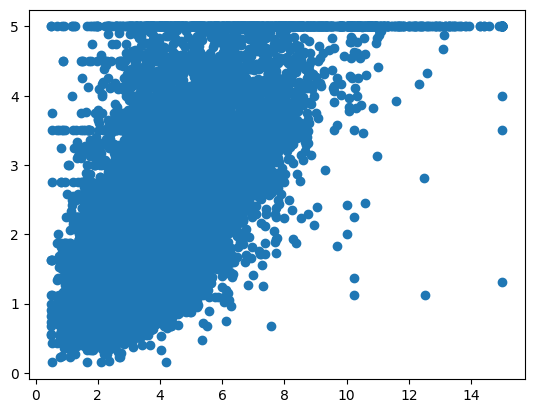

1


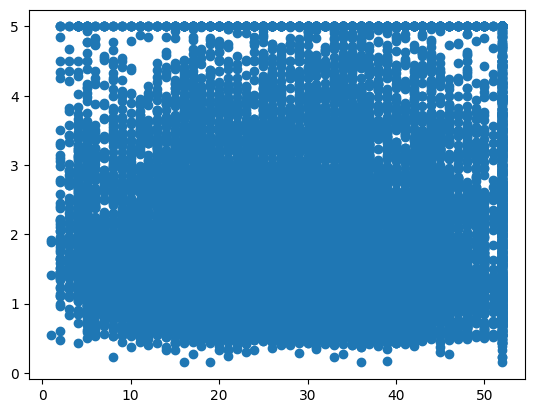

2


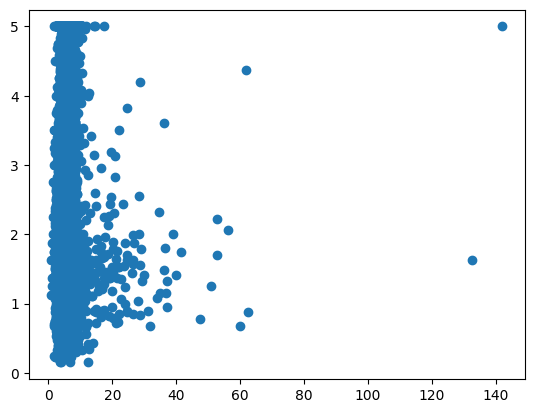

3


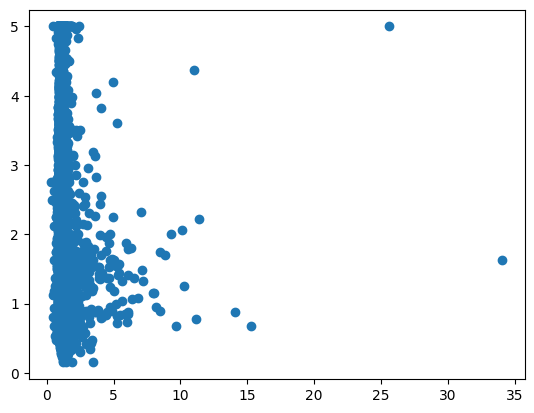

4


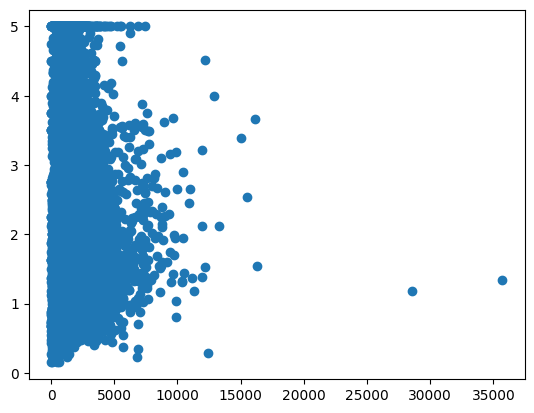

5


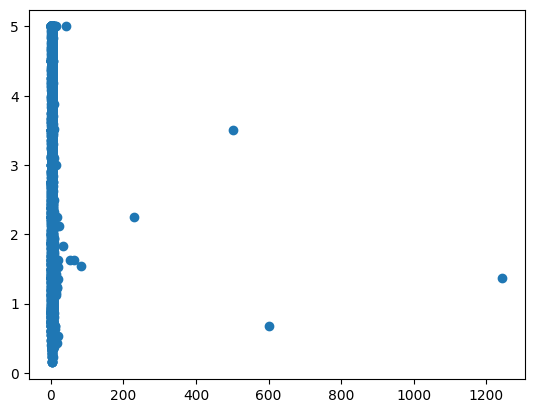

6


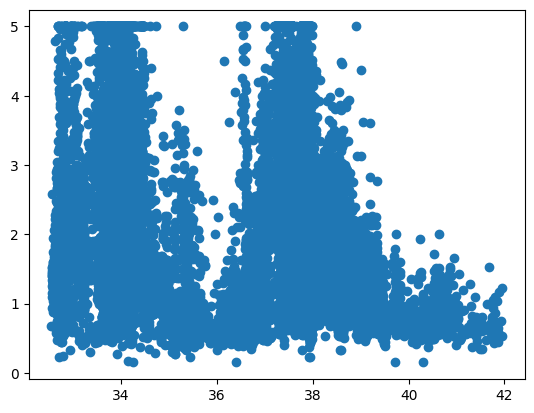

7


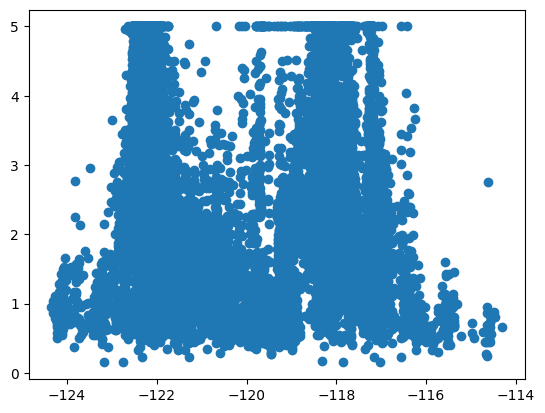

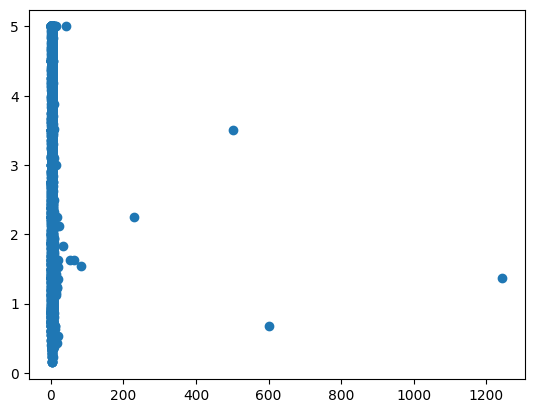

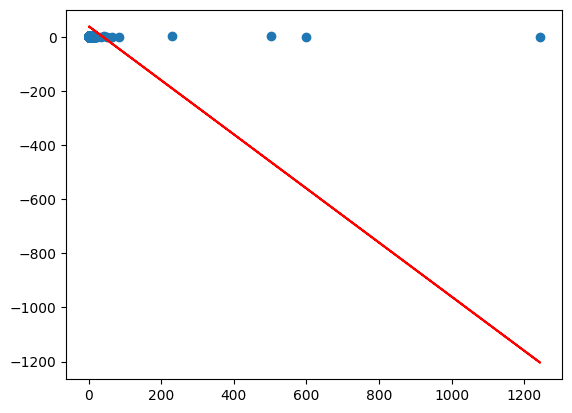

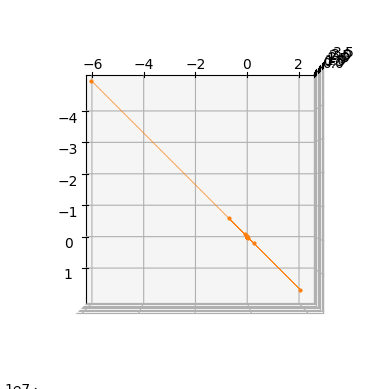

In [10]:



from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

import pandas as pd
import numpy as np

california_housing.keys()

X, Y = california_housing.data, california_housing.target
X.shape, Y.shape

import matplotlib.pylab as plt

for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:, i], Y)
    plt.show()

X_feature = X[:, 5:6]
plt.scatter(X_feature, Y)
plt.show()

def modelo_linear(X, a, b):
    y = a*X + b
    return y

ypred = modelo_linear(X_feature, -1, 40)
plt.scatter(X_feature, Y)
plt.plot(X_feature, ypred, 'r')
plt.show()

def mae(y, ypred):
    yDiff = ypred - y.reshape(-1, 1)
    yAbs = abs(yDiff)
    errorSum = sum(yAbs)
    mae = errorSum / len(yAbs)
    return mae

ypred = modelo_linear(X_feature, -1, 40)
mae(Y, ypred)

def mse(y, ypred):
    yDiff = ypred - y.reshape(-1, 1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum / len(yDiffSquare)
    return mse

ypred = modelo_linear(X_feature, -1, 40)
mse(Y, ypred)

from math import sqrt

def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1, 1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum / len(yDiffSquare)
    return sqrt(mse)

ypred = modelo_linear(X_feature, -1, 40)
rmse(Y, ypred)

from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
    mse = mean_squared_error(y, ypred)
    return sqrt(mse)

ypred = modelo_linear(X_feature, -1, 40)
rmse(Y, ypred)

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# class regressao_linear():
#     def __init__(self):
#         self.w = np.zeros((2, 1))
#         self.a = 0
#         self.b = 0
#         self.wh = []

#     @staticmethod
#     def addBias(X):
#         bias = np.ones((X.shape[0], 1))
#         X_b = np.concatenate((bias, X), axis=1)
#         return X_b

#     def fit(self, X, Y):
#         X_b = self.addBias(X)
#         for _ in range(500):
#             ypred = self.predict(X)
#             erro = ypred - Y.reshape(-1, 1)
#             ajuste = X_b.T.dot(erro) / sum(X_b).reshape(-1, 1)
#             self.w = self.w - 0.1 * ajuste

#     def predict(self, X):
#         X_b = self.addBias(X)
#         y = X_b.dot(self.w)
#         return y

# plt.scatter(X_feature, Y)

# modelo = regressao_linear()
# ypred = modelo.predict(X_feature)
# print(rmse(Y, ypred))
# plt.plot(X_feature, ypred, 'r')

# modelo.fit(X_feature, Y)

# ypred = modelo.predict(X_feature)
# print(rmse(Y, ypred))
# plt.plot(X_feature, ypred, 'g')

# plt.show()
# modelo.w

# w0 = np.linspace(33, 36, 30)
# w1 = np.linspace(-1, -0.8, 30)

# def z_function(W0, W1, X, Y):
#     modelo = regressao_linear()
#     Erro = np.empty(W0.shape)
#     for j in range(Erro.shape[0]):
#         for k in range(Erro.shape[1]):
#             modelo.w[0] = W0[j][k]
#             modelo.w[1] = W1[j][k]
#             ypred = modelo.predict(X)
#             mse = mean_squared_error(Y, ypred)
#             Erro[j][k] = mse
#     return Erro

# ax = plt.axes(projection="3d")
# W0, W1 = np.meshgrid(w0, w1)
# Erro = z_function(W0, W1, X_feature, Y)

# ax.plot_wireframe(w0, w1, Erro)
# ax.plot_surface(w0, w1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')
# plt.show()

# plt.ylabel("Erro")
# plt.xlabel("W0")
# i = 8
# plt.plot(W0[i, :], Erro[i, :])
# plt.show()

# plt.ylabel("Erro")
# plt.xlabel("W1")
# i = 8
# plt.plot(W1[:, i], Erro[:, i])
# plt.show()

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2, 1))
        self.wh = []

    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0], 1))
        X_b = np.concatenate((bias, X), axis=1)
        return X_b

    def fit(self, X, Y):
            X_b = self.addBias(X)
            for _ in range(20):
                ypred = self.predict(X)
                erro = ypred - Y.reshape(-1, 1)
                ajuste = X_b.T.dot(erro) / sum(X_b).reshape(-1, 1)
                self.w = self.w - 0.1 * ajuste
                ypred = self.predict(X)
                mse = mean_squared_error(Y, ypred)
                self.wh.append([self.w[0, 0], self.w[1, 0], mse])
    def predict(self, X):
      X_b = self.addBias(X)
      y = X_b.dot(self.w)
      return y

    w0 = np.linspace(0, 16, 20)
    w1 = np.linspace(0, 2, 20)

    def z_function(W0, W1, X, Y):
        modelo = regressao_linear()
        Erro = np.empty(W0.shape)
        for j in range(Erro.shape[0]):
            for k in range(Erro.shape[1]):
                modelo.w[0] = W0[j][k]
                modelo.w[1] = W1[j][k]
                ypred = modelo.predict(X)
                mse = mean_squared_error(Y, ypred)
                Erro[j][k] = mse
        return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1, X_feature, Y)

ax.plot_wireframe(w0, w1, Erro)
ax.plot_surface(w0, w1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()
modelo.fit(X_feature, Y)
ypred = modelo.predict(X_feature)
wh = np.array(modelo.wh)
ax.plot(wh[:, 0], wh[:, 1], wh[:, 2], marker='o', linewidth=0.5, markersize=2)
ax.view_init(azim=0, elev=90)

plt.show()
